# PREDICTING COVID-19 DISEASE FROM SYMPTOMS USING ML

THIS NOTEBOOK USES VARIOUS PYTHON-BASED ML AND DATA SCIENCE LIBRARIES IN AN ATTEMPT TO BUILD A ML MODEL CAPABLE OF PREDICTING WHETHER OR NOT SOMEONE HAS COVID BASED ON THEIR MEDICAL ATTRIBUTES .

-------------------------------------------------------------------------------------------------------------------------------

#  Problem Statement
> Given clinical parameters about a patient , can we predict whether or not they have covid 19

# Data Availability
>All the data used in this study were retrieved from the Israeli Ministry of Health website11. The dataset was downloaded, translated into English, and can be accessed at: https://github.com/nshomron/covidpred/blob/master/data/corona_tested_individuals_ver_0083.english.csv.zip

>The original version of dataset was downloaded from https://data.gov.il/dataset/covid-19 on November 15, 2020 and translated into English

# Model Predictors/Features and Exact Variable Names (True = 1, False = 0)
1. Age over 60 - Age_60_and_above
2. Sex - (Male=1, Female=0)
3. Cough - Cough
4. Shortness of breath - Shortness_of_breath
5. Fever - Fever
6. Sore throat - Sore_throat
7. Headache - Headache
8. Contact with a confirmed individual - Contact_with_confirmed

-------------------------------------------------------------------------------------------------------------------------------

# Preparing the tools
We are going to use pandas , numpy , matplotlib and sklearn for data analysis and manipulation.

### Import all tools

In [2]:
# regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# managing data
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# models from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# model-evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,plot_roc_curve

# Loading Data

In [3]:
df=pd.read_csv("datasets/corona_tested_individuals_ver_0083.english.csv")
df

C:\Users\sunshine\Desktop\ml_and_data_sciene\sample\env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


# Setting up our required data

## Removing rows with missing and duplicate values 

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
5,2020-11-12,1,0,0,0,0,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
2731618,2020-03-20,0,0,0,0,0,negative,Yes,male,Contact with confirmed
2731620,2020-03-20,0,0,1,1,0,positive,No,female,Contact with confirmed
2731622,2020-03-20,1,0,0,1,0,positive,Yes,female,Contact with confirmed
2731634,2020-03-20,1,0,1,0,1,negative,No,female,Contact with confirmed


**<font color="green"> We observe that original data contained `2742596 rows × 10 columns` , but now after removing rows with missing or duplicate data , we are left with only `36734 rows × 10 columns`. </font>**

## Removing rows with corona_result=other

In [5]:
df["corona_result"].value_counts()

positive    19867
negative    13550
other        3317
Name: corona_result, dtype: int64

In [6]:
index_names=df[df["corona_result"]=="other"].index
df.drop(index_names,inplace=True)
df["corona_result"].value_counts()

positive    19867
negative    13550
Name: corona_result, dtype: int64

In [7]:
df.shape

(33417, 10)

**<font color="green"> Now , we are left with only `33417 rows × 10 columns`. </font>**

## Managing the types of data
We have to make sure that the data is numerical for better working of our model , so we will turn all categorical data into numerical columns .

In [8]:
df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [9]:
dummies=pd.get_dummies(df[["test_indication"]])
dummies

,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,0,0,1
1,0,0,1
2,0,0,1
4,0,1,0
5,0,0,1
...,...,...,...
2731618,0,1,0
2731620,0,1,0
2731622,0,1,0
2731634,0,1,0


In [10]:
df["Contact_with_confirmed"]=dummies["test_indication_Contact with confirmed"]
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Contact_with_confirmed
0,2020-11-12,0,0,0,0,0,negative,No,male,Other,0
1,2020-11-12,0,1,0,0,0,negative,No,male,Other,0
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other,0
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed,1
5,2020-11-12,1,0,0,0,0,negative,No,male,Other,0


In [11]:
le=LabelEncoder()
df["corona_result"]=le.fit_transform(df["corona_result"])
df["age_60_and_above"]=le.fit_transform(df["age_60_and_above"])
df["gender"]=le.fit_transform(df["gender"])
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,Contact_with_confirmed
0,2020-11-12,0,0,0,0,0,0,0,1,Other,0
1,2020-11-12,0,1,0,0,0,0,0,1,Other,0
2,2020-11-12,0,0,0,0,0,0,1,0,Other,0
4,2020-11-12,0,1,0,0,0,0,0,1,Contact with confirmed,1
5,2020-11-12,1,0,0,0,0,0,0,1,Other,0
...,...,...,...,...,...,...,...,...,...,...,...
2731618,2020-03-20,0,0,0,0,0,0,1,1,Contact with confirmed,1
2731620,2020-03-20,0,0,1,1,0,1,0,0,Contact with confirmed,1
2731622,2020-03-20,1,0,0,1,0,1,1,0,Contact with confirmed,1
2731634,2020-03-20,1,0,1,0,1,0,0,0,Contact with confirmed,1


## Removing unwanted columns
There are some columns in our data which we doesn't require in our model like test_date and test_indication . So we are going to remove them .


In [12]:
df.drop(["test_date","test_indication"],axis=1,inplace=True)
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Contact_with_confirmed
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,1
5,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2731618,0,0,0,0,0,0,1,1,1
2731620,0,0,1,1,0,1,0,0,1
2731622,1,0,0,1,0,1,1,0,1
2731634,1,0,1,0,1,0,0,0,1


# Final DataFrame

In [13]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Contact_with_confirmed
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,1
5,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2731618,0,0,0,0,0,0,1,1,1
2731620,0,0,1,1,0,1,0,0,1
2731622,1,0,0,1,0,1,1,0,1
2731634,1,0,1,0,1,0,0,0,1


# Data exploration or EDA ( Exploratory Data Analysis )

### Frequency Analysis of different features

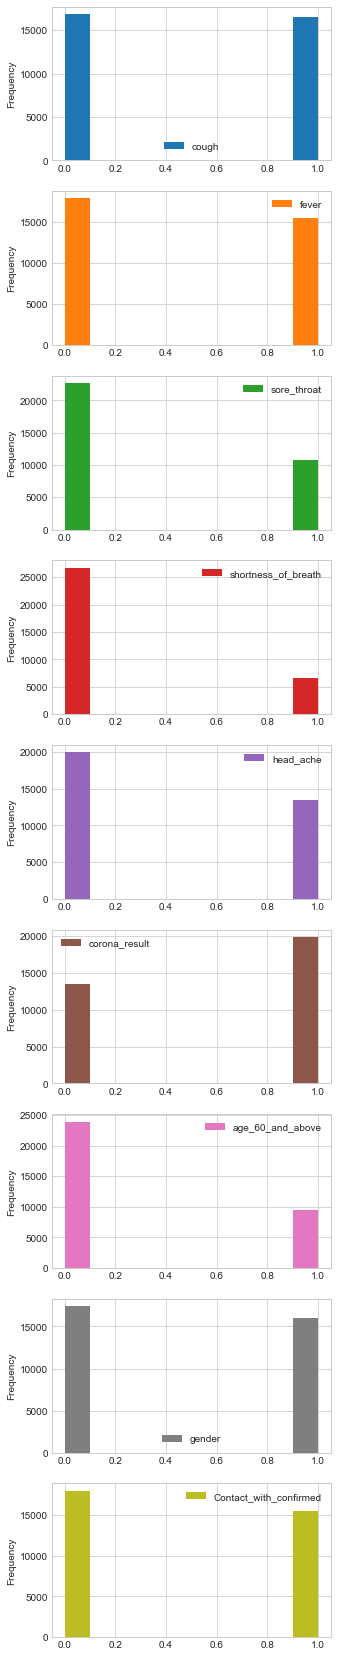

In [13]:
plt.style.use("seaborn-whitegrid")
df.plot.hist(subplots=True,figsize=(5,30),sharex=False);

<font color="green">**Based on above plots , we can conclude the following points -**
1. Cough - There are approximately equal no. of patients with and without cough in our data .
2. Fever - No. of patients with fever are less than people without fever
3. Sore throat - No. of patients with sore throat are less than half times the patients without sore throat 
4. Shortness of breadth - No. of patients who suffer from shortness of breadth is about 1/5 times the no. of patients without      shortness of breadth
5. Headache - The no. of patients who suffer from headache is much less than patients without headache
6. Corona Result - The frequency of positive corona patients is much higher than those of corona negative patients
7. Age 60 and above - Most of the patients are less than age 60 
8. Gender - The no. of female patients is greater than male patients
9. Contact with confirmed - Lesser people had contact with confirmed patients</font>

### Corona Result Column Analysis
We are going to analyse the different aspects of the target column i.e. corona_resut

In [14]:
df["corona_result"].value_counts()

1    19867
0    13550
Name: corona_result, dtype: int64

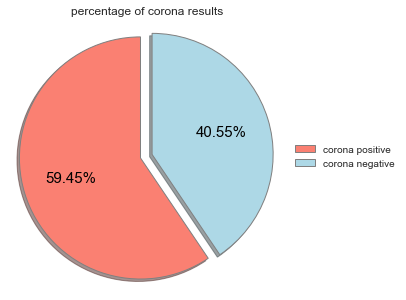

In [15]:
# df["corona_result"].value_counts().plot(kind="pie",
#                                         xlabel="corona result (1=positive , 0=negative)",ylabel="no. of patients"
#                                         );

# plt.pie(df.corona_result.value_counts(),labels=True,autopct="1.2f%%");
fig,ax=plt.subplots(figsize=(5,5))
wedges,texts,autotexts=ax.pie(df["corona_result"].value_counts(),
       explode=(0,0.1),shadow=True,startangle=90,
       autopct="%1.2f%%",
       colors=["salmon","lightblue"],
       wedgeprops={"linewidth":1,"edgecolor":"gray"},
       textprops={"color":"black","size":15}
       )
ax.axis("equal")
ax.legend(wedges,["corona positive","corona negative"],loc="center left",bbox_to_anchor=(1,0,0.5,1))
ax.set_title("percentage of corona results")
plt.show();

**<font color="green">We observe that we have more entries for corona positive cases(19867) than corona negative cases (13550)</font>**

### Corona Result vs Other Columns

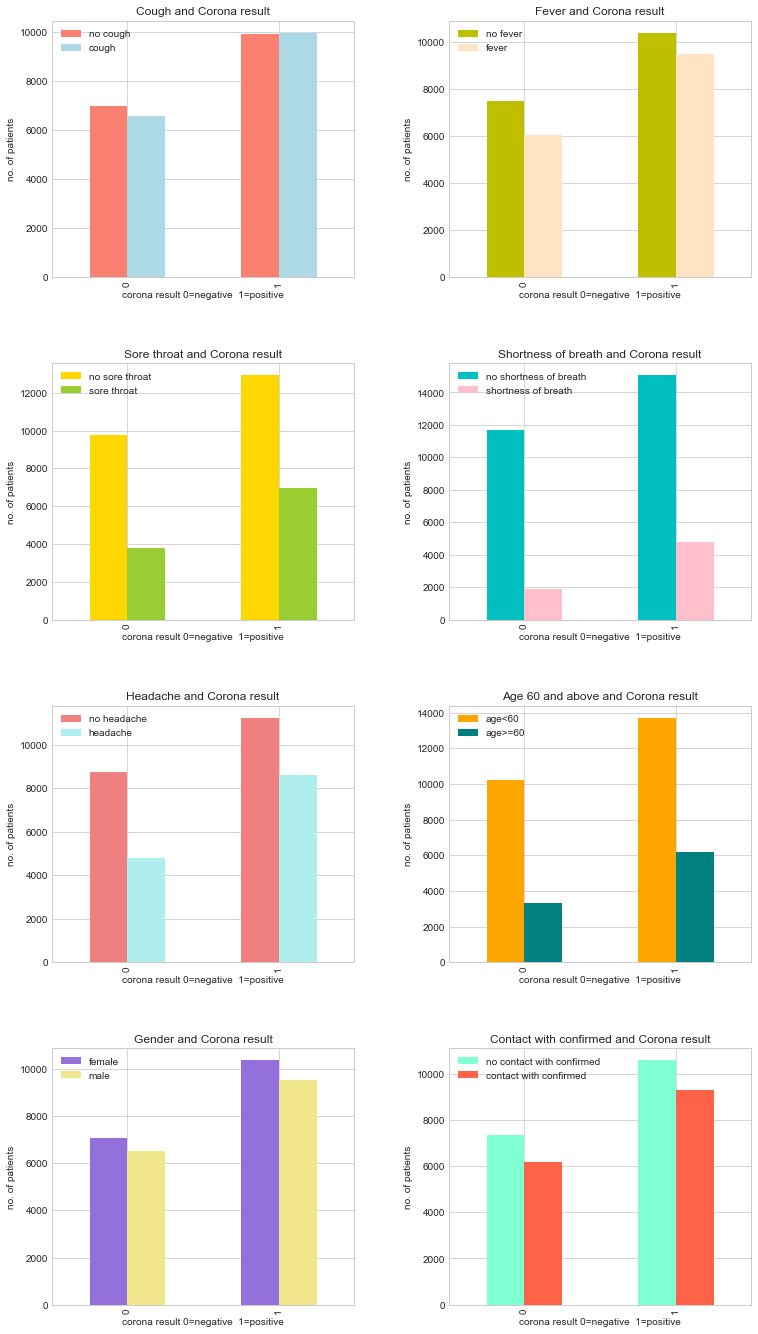

In [16]:
plt.style.use("seaborn-whitegrid")
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(12,20))
fig.tight_layout(pad=7.0)

pd.crosstab(df["corona_result"],df["cough"]).plot(kind="bar",color=["salmon","lightblue"],
                                                  ax=ax[0][0],
                                                  title="Cough and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[0][0].legend(["no cough","cough"])

pd.crosstab(df["corona_result"],df["fever"]).plot(kind="bar",color=["y","bisque"],
                                                  ax=ax[0][1],
                                                  title="Fever and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[0][1].legend(["no fever","fever"])

pd.crosstab(df["corona_result"],df["sore_throat"]).plot(kind="bar",color=["gold","yellowgreen"],
                                                  ax=ax[1][0],
                                                  title="Sore throat and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[1][0].legend(["no sore throat","sore throat"])

pd.crosstab(df["corona_result"],df["shortness_of_breath"]).plot(kind="bar",color=["c","pink"],
                                                  ax=ax[1][1],
                                                  title="Shortness of breath and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[1][1].legend(["no shortness of breath","shortness of breath"])

pd.crosstab(df["corona_result"],df["head_ache"]).plot(kind="bar",color=["lightcoral","paleturquoise"],
                                                  ax=ax[2][0],
                                                  title="Headache and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[2][0].legend(["no headache","headache"])

pd.crosstab(df["corona_result"],df["age_60_and_above"]).plot(kind="bar",color=["orange","teal"],
                                                  ax=ax[2][1],
                                                  title="Age 60 and above and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[2][1].legend(["age<60","age>=60"])

pd.crosstab(df["corona_result"],df["gender"]).plot(kind="bar",color=["mediumpurple","khaki"],
                                                  ax=ax[3][0],
                                                  title="Gender and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[3][0].legend(["female","male"])

pd.crosstab(df["corona_result"],df["Contact_with_confirmed"]).plot(kind="bar",color=["aquamarine","tomato"],
                                                  ax=ax[3][1],
                                                  title="Contact with confirmed and Corona result",
                                                  xlabel="corona result 0=negative  1=positive",
                                                  ylabel="no. of patients",
                                                 )
ax[3][1].legend(["no contact with confirmed","contact with confirmed"]);

<font color="green">**Based on above plots , we can conclude the following points -**
    
1. Cough - Cough doesn't have much effect on corona positivity of the patients . Corona positive and negative patients have        almost equal proportion of patients with and without cough . Although positive patients are more likely to have cough
2. Fever - No. of patients with no fever are more in both corona positive and negative patients
3. Sore throat - The proportion of people with sore throat is much less than people without sore throat in both the cases
4. Shortness of breadth - Most of the positive as well as negative patients don't suffer from shortness of breadth
5. Headache - The proportion of people with headache is less than people without headache in both positive and negative cases
6. Age 60 and above - Most of the positive as well as negative patients are less than 60 years of age 
7. Gender - The no. of female patients is greater than male patients in both positive and negative cases
8. Contact with confirmed - People with no contact with confirmed are greater in both cases
</font> 

### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables .
Each cell in table shows correlation between 2 variables . It is used to summarize data , as an input into a more advanced analysis , and as a diagnostic for advanced analysis .

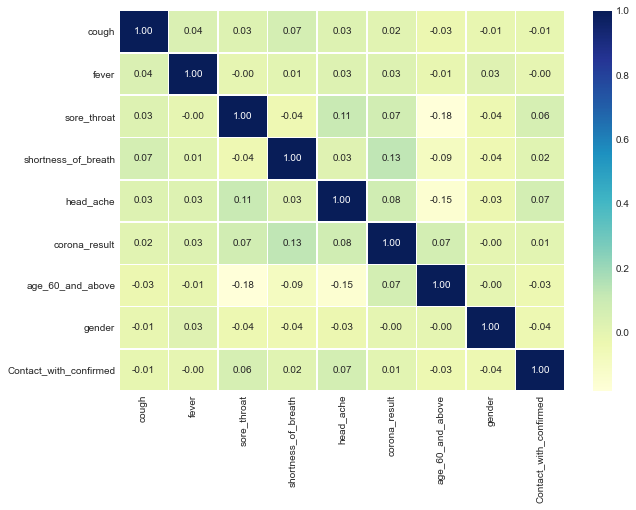

In [17]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

# Splitting Data 

In [15]:
x=df.drop("corona_result",axis=1)
y=df["corona_result"]

np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
x_train.shape,x_test.shape,x.shape

((26733, 8), (6684, 8), (33417, 8))

In [17]:
y_train.shape,y_test.shape,y.shape

((26733,), (6684,), (33417,))

<font color="green">**We observe that our original data contained '33417' entries . We divided that into train and test data containing '26733' and '6684' entries respectively i.e. test data is approximately 20% of total data and train data is 80% of original data**</font>

# Selecting right model


## Trying different models
Since we are dealing with a classification problem , we are going to try these 7 models -
1. Logistic Regression
2. Decision Tree
3. K Nearest Neighbours 
4. Random Forest
5. Naïve Bayes
6. Stochastic Gradient Descent
7. Support Vector Machine

In [18]:
# put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier(),
        "GNB":GaussianNB(),
        "SGDC":SGDClassifier(),
        "SVC":SVC()
       }

In [19]:
# create a function to fit and score models
def fit_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given ml models
    models:dict of diff sklearn models
    x_train:training data(no labels)
    x_test:testing data (no labels)
    y_train:training labels
    y_test:testing labels
    """
    np.random.seed(42)
    
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [20]:
# checking scores of our models
model_scores=fit_score(models,x_train,x_test,y_train,y_test)
model_scores

{'Logistic Regression': 0.6154997007779772,
 'Decision Tree': 0.6101137043686415,
 'KNN': 0.5607420706163974,
 'Random Forest': 0.610263315380012,
 'GNB': 0.6081687612208259,
 'SGDC': 0.5985936564931179,
 'SVC': 0.6116098144823459}

## Model Comparison

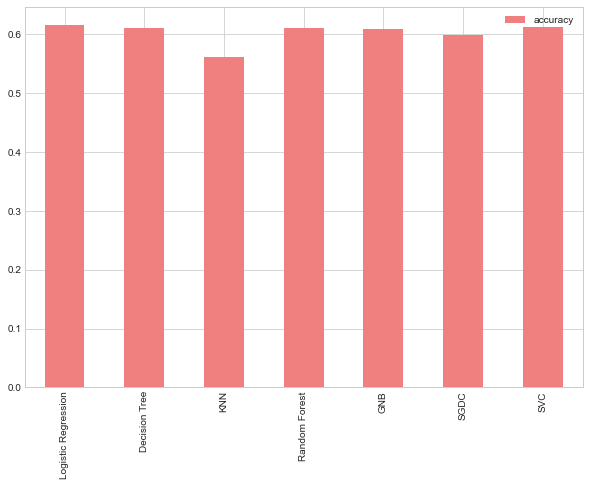

In [24]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar",figsize=(10,7),color="lightcoral");

<font color="green">**After analysing model scores and the above plot , we find that `Logistic Regression` , `Decision Tree` , `SVC` and `Random Forest` gives best accuracy. So we will now work on these models .**</font>

## Hyperparameter tuning with RandomizedSearchCV

In [65]:
# hyperparameter grid for LogisticRegression()
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"],
              'penalty': ['l1', 'l2'],
             }


# hyperparameter grid for RandomForestClassifier()
rf_grid={"n_estimators":[100,200,500,800,1500,2500,5000],
         "max_depth":[None,3,5,10,30,50],
         "max_features":["auto","sqrt","log2"],
         "min_samples_split":[2,5,10,15,20],
         "min_samples_leaf":[1,2,5,10,15]
        }

# hyperparameter grid for DecisionTreeClassifier()
dt_grid={"criterion" : ['gini', 'entropy'],
         "max_depth" : [2,4,6,8,10,12]
}

# hyperparameter grid for SVC()
svc_grid={'C': [1, 10, 100, 1000], 
         'gamma': [0.001, 0.0001], 
         'kernel': ['rbf']
}

In [39]:
rs_scores={}

### tuning LogisticRegression()

In [40]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.615848211066026}

In [42]:
rs_scores['Logistic Regression']=rs_log_reg.score(x_test,y_test)
rs_scores['Logistic Regression']

0.6154997007779772

### tuning RandomForestClassifier()

In [68]:
# np.random.seed(42)
# rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,verbose=True)
# rs_rf.fit(x_train,y_train)

In [ ]:
# rs_rf.best_params_

In [ ]:
# rs_scores["Random Forest"]=rs_rf.score(x_test,y_test)
# rs_scores["Random Forest"]

### tuning DecisionTreeClassifier()

In [43]:
np.random.seed(42)
rs_dt=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=dt_grid,n_iter=20,verbose=True)
rs_dt.fit(x_train,y_train)

C:\Users\sunshine\Desktop\ml_and_data_sciene\sample\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12]},
                   verbose=True)

In [44]:
rs_dt.best_params_

{'max_depth': 4, 'criterion': 'gini'}

In [45]:
rs_scores['Decision Tree']=rs_dt.score(x_test,y_test)
rs_scores['Decision Tree']

0.6190903650508678

### tuning SVC()

In [30]:
# np.random.seed(42)
# rs_svc=RandomizedSearchCV(SVC(),param_distributions=svc_grid,n_iter=20,verbose=True)
# rs_svc.fit(x_train,y_train)

In [ ]:
# rs_svc.best_params_

In [ ]:
# rs_scores['SVC']=rs_svc.score(x_test,y_test)
# rs_scores['SVC']

### RandomizedSearchCV model comparison
Even after changing hyper parameters using RandomizedSearchCV , we couldn't improve the score much .

## Hyperparameter tuning with GridSearchCV

In [36]:
gs_scores={}

In [58]:
# hyperparameter grid for LogisticRegression()
log_reg_grid={"C":np.logspace(-1,1,20),
              "solver":["liblinear"],
              'penalty': ['l2'],
             }


# hyperparameter grid for RandomForestClassifier()
rf_grid={"n_estimators":np.arange(100,300,50),
         "max_depth":[None,3],
         "min_samples_split":np.arange(2,10,2),
         "min_samples_leaf":np.arange(10,20,4)
        }

# hyperparameter grid for DecisionTreeClassifier()
dt_grid={"criterion" : ['gini'],
         "max_depth" : [2,4,6]
}

# hyperparameter grid for SVC()
svc_grid={'C': [1, 10, 100, 1000], 
         'gamma': [0.001, 0.0001], 
         'kernel': ['rbf']
         }

### tuning LogisticRegression()

In [47]:
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'penalty': ['l2'], 'solver': ['liblinear']},
             verbose=True)

In [48]:
gs_log_reg.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [49]:
gs_scores["Logistic Regression"]=gs_log_reg.score(x_test,y_test)
gs_scores["Logistic Regression"]

0.6154997007779772

### tuning DecisionTreeClassifier()

In [60]:
gs_dt=GridSearchCV(DecisionTreeClassifier(),param_grid=dt_grid,verbose=True)
gs_dt.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 6]},
             verbose=True)

In [61]:
gs_dt.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [62]:
gs_scores["Decision Tree"]=gs_dt.score(x_test,y_test)
gs_scores["Decision Tree"]

0.6190903650508678

## Model Comparison

In [69]:
model_scores

{'Logistic Regression': 0.6154997007779772,
 'Decision Tree': 0.6101137043686415,
 'KNN': 0.5607420706163974,
 'Random Forest': 0.610263315380012,
 'GNB': 0.6081687612208259,
 'SGDC': 0.5985936564931179,
 'SVC': 0.6116098144823459}

In [91]:
rs_scores['KNN']=0
rs_scores['Random Forest']=0
rs_scores['GNB']=0
rs_scores['SGDC']=0
rs_scores['SVC']=0
rs_scores

{'Logistic Regression': 0.6154997007779772,
 'Decision Tree': 0.6190903650508678,
 'KNN': 0,
 'Random Forest': 0,
 'GNB': 0,
 'SGDC': 0,
 'SVC': 0}

In [101]:
gs_scores['KNN']=0
gs_scores['Random Forest']=0
gs_scores['GNB']=0
gs_scores['SGDC']=0
gs_scores['SVC']=0
gs_scores

{'Logistic Regression': 0.6154997007779772,
 'Decision Tree': 0.6190903650508678,
 'KNN': 0,
 'Random Forest': 0,
 'GNB': 0,
 'SGDC': 0,
 'SVC': 0}

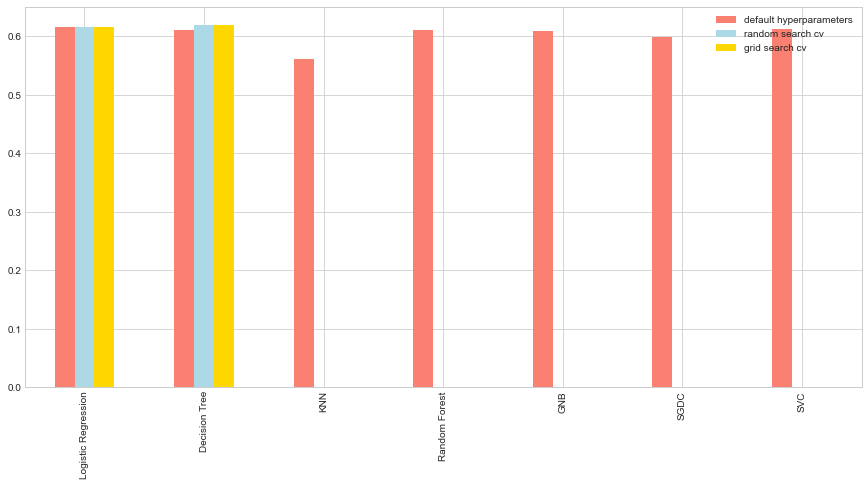

In [108]:
plt.style.use("seaborn-whitegrid")
model_compare={"default hyperparameters":model_scores,
               "random search cv":rs_scores,
               "grid search cv":gs_scores
              }
pd.DataFrame(model_compare).plot(kind="bar",figsize=(15,7),color=["salmon","lightblue","gold"])
plt.show()

<font color="green">**From above analysis we observe that the maximum accuracy that we can get is `0.6190903650508678` by setting hyperparameters of `Decision Tree` . So we will move further with this model only !!** </font>

# Evaluating our ML classifier beyond accuracy

In [109]:
# make predictions with our tuned  model
y_preds=gs_dt.predict(x_test)
y_preds

array([1, 1, 1, ..., 1, 1, 1])

In [110]:
pd.array(y_test)

<PandasArray>
[1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
 ...
 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
Length: 6684, dtype: int32

## ROC Curve and AUC

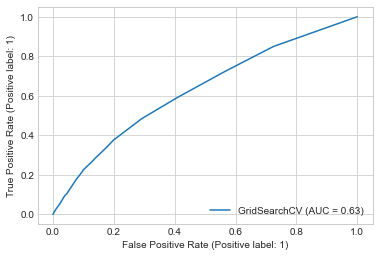

In [112]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_dt,x_test,y_test);

## Confusion Matrix

In [113]:
print(confusion_matrix(y_test,y_preds))

[[ 739 1944]
 [ 602 3399]]


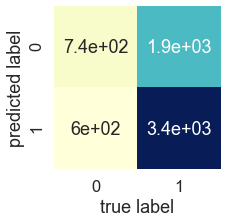

In [125]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_pred):
    """
    plots a nice looking confusion matrix using seaborn heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,cmap="YlGnBu")
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)

## Classification Report ( precision , recall , f1 )

In [128]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.55      0.28      0.37      2683
           1       0.64      0.85      0.73      4001

    accuracy                           0.62      6684
   macro avg       0.59      0.56      0.55      6684
weighted avg       0.60      0.62      0.58      6684

